In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import torch
from torch.nn import Module, Linear, Conv2d, MaxPool2d, LeakyReLU, Sequential, BatchNorm2d, Sigmoid, ConvTranspose2d
from torch import nn
from generators import Generator, Discriminator
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import PILToTensor, ConvertImageDtype, Compose, Normalize, ToTensor
import matplotlib.pyplot as plt

In [2]:
img_transforms = Compose([
    ToTensor(),
    Normalize(mean=(0.5), std=(0.5))
])

root_dir = './data/mnist/'
train_dataset = MNIST(root=root_dir+'train', train=True, download=True, transform=img_transforms)


batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=20)


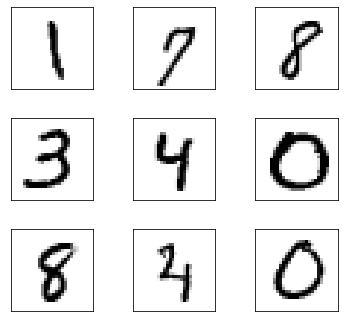

In [3]:
from utils_gen import plot_images
plot_images(train_loader)

In [4]:
#6013383838

#### Train Deep Convolutional GAN on MNIST

* Instantiate the generator and discriminator
* Create the optimizers
* Create the loss functions
* Iterate over the batches of the dataloarder
* Update the weights (optimizer step)
* Compute the losses and generate images

In [5]:
from utils_gen import Trainner

In [22]:
Discriminator()(torch.randn(1, 1, 28, 28))

tensor([-0.3572], grad_fn=<SqueezeBackward1>)

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trainer = Trainner(Generator(), Discriminator(), train_loader, device)

  0%|          | 0/9380 [00:00<?, ?it/s]

Epoch: 0 - D loss: 0.1813272386789322 - G loss: 5.238272666931152
Epoch: 1 - D loss: 0.27175822854042053 - G loss: 4.490516662597656
Epoch: 2 - D loss: 0.3683212399482727 - G loss: 7.852313995361328
Epoch: 3 - D loss: 0.07653987407684326 - G loss: 6.0467963218688965
Epoch: 4 - D loss: 0.3020988404750824 - G loss: 5.287548542022705
Epoch: 5 - D loss: 0.2503760755062103 - G loss: 5.390249252319336
Epoch: 6 - D loss: 0.07829605042934418 - G loss: 3.6239218711853027
Epoch: 7 - D loss: 0.8837190866470337 - G loss: 1.2149786949157715
Epoch: 8 - D loss: 0.2249602973461151 - G loss: 7.606654167175293
Epoch: 9 - D loss: 0.029398895800113678 - G loss: 6.441781997680664


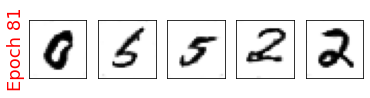

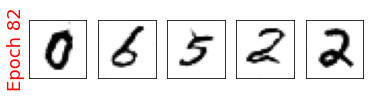

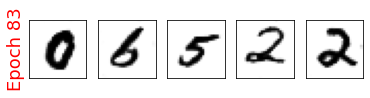

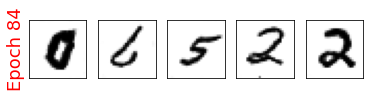

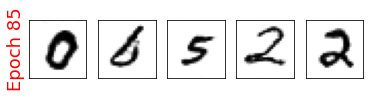

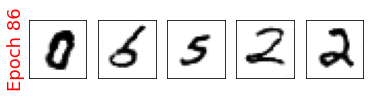

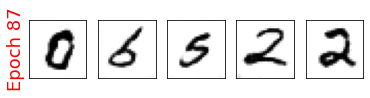

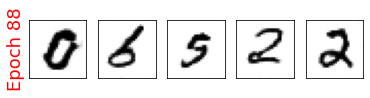

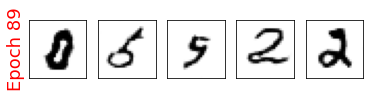

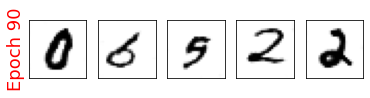

In [111]:
trainer.train_both(epochs=10, train_gen_every=1, train_dis_every=3, z_mode='normal')

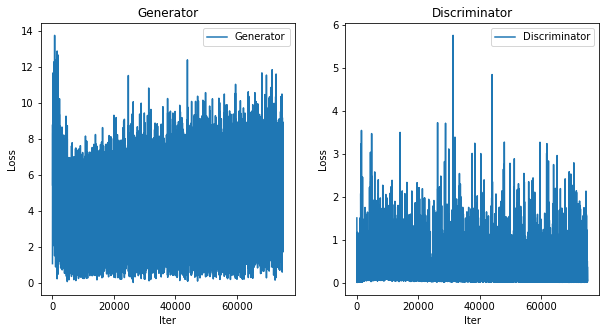

In [92]:
from utils_gen import plot_losses
plot_losses(trainer)

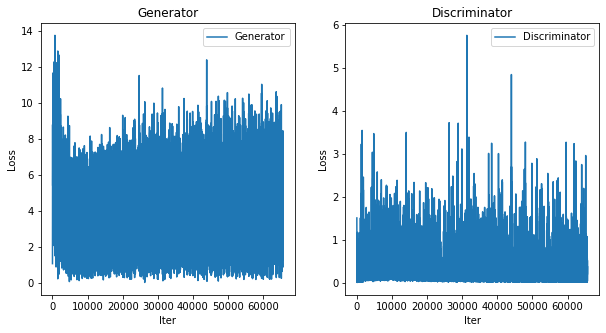

In [29]:

from utils_gen import plot_losses
plot_losses(trainer)

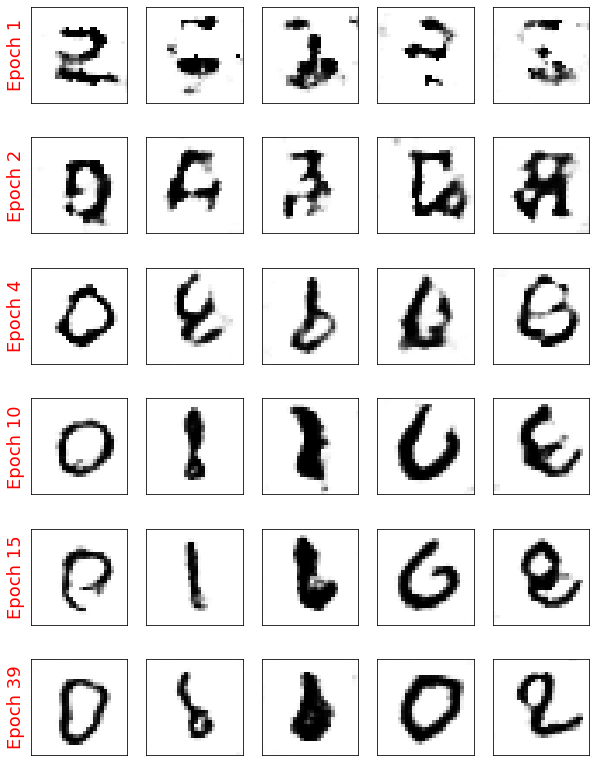

In [30]:
from utils_gen import plot_epochs_images
plot_epochs_images(trainer.epoch_samples)

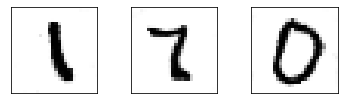

In [132]:
from utils_gen import generate_and_show
generate_and_show(trainer.generator, device)

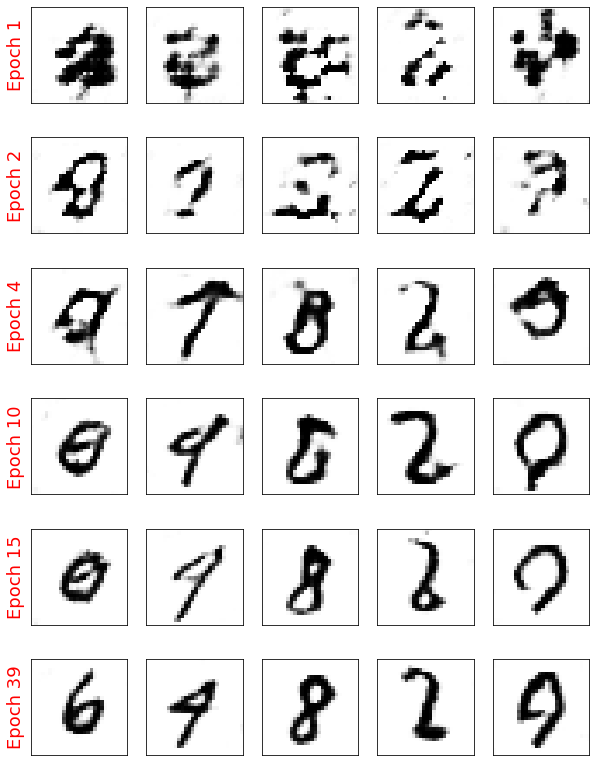

In [64]:

from utils_gen import plot_epochs_images
plot_epochs_images(trainer.epoch_samples)

In [69]:
trainer.epoch_samples[0][0].min(), trainer.epoch_samples[0][0].max()

(0.0, 0.99998885)

In [65]:
from utils_gen import sample_from_latent
z_input = sample_from_latent(3).to(device)
fake_imgs = trainer.generator(z_input)
img0 = fake_imgs.detach().cpu().numpy()

In [67]:
img0[0].min(), img0[0].max()

(-1.0, 0.99985456)